<a href="https://colab.research.google.com/github/shariya07/TSFcomputervision/blob/main/TSFcomputervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Computer Vision and Internet of things**

Shariya Alam 

Task 2: Colour Identification

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76


In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

[array([116.3718095 , 160.07215172, 182.88578354]),
 array([18.97094394, 24.56494965, 13.73541649]),
 array([185.78635088, 224.39498246, 246.6382807 ]),
 array([116.43548637,  81.83937529,  26.74266949]),
 array([ 83.60183545, 116.1966672 , 140.137981  ]),
 array([44.46580049, 47.17418662, 32.57390744]),
 array([204.00038787, 116.99751765,  39.64897991]),
 array([57.22305823, 63.07459672, 74.69546506])]

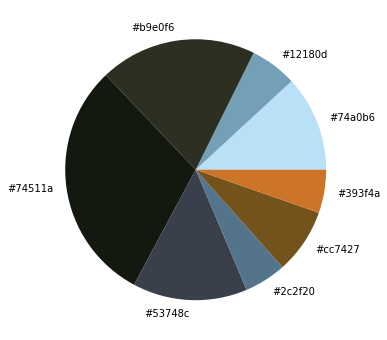

In [ ]:
get_colors(get_image('sampicture.jpeg'), 8, True)

Sample Input

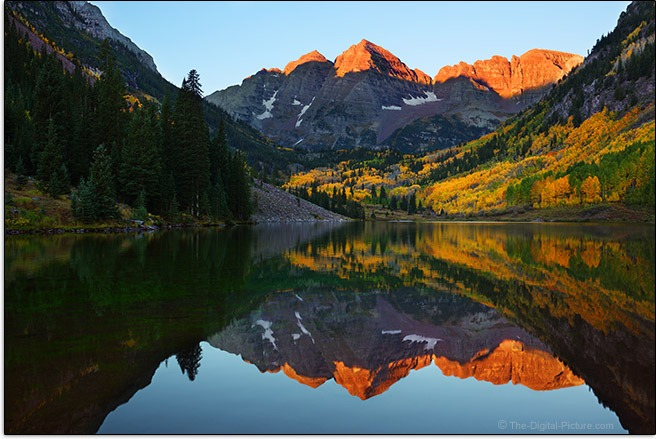